<a href="https://colab.research.google.com/github/Jaskaran197/Red-blood-cell-detection-SSD/blob/main/Red_blood_cell_detectionFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Jaskaran197/Red-blood-cell-detection-SSD

Cloning into 'Red-blood-cell-detection-SSD'...
remote: Enumerating objects: 354, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 354 (delta 1), reused 0 (delta 0), pack-reused 348
Receiving objects: 100% (354/354), 17.76 MiB | 24.19 MiB/s, done.
Resolving deltas: 100% (131/131), done.


In [2]:
import os

In [3]:
os.chdir('Red-blood-cell-detection-SSD')

In [4]:
#!pip install -r requirements.txt

In [5]:
#!cp -R Red-blood-cell-detection-SSD/* ./

In [6]:

#!cd Red-blood-cell-detection-SSD  

In [153]:
!python train.py configs/ssd300_vgg16_pascal-voc-2007.json ./ ./ --training_split=train.txt --validation_split=val.txt --label_maps label_map.txt --learning_rate=0.001 --epochs=200 --batch_size=9 --shuffle=True --augment=True --output_dir=./ --checkpoint=model.h5

-- validation split specified
2021-12-15 06:42:30.113413: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.

Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/200
2021-12-15 06:42:39.758353: W tensorflow/core/common_runtime/bfc_allocator.cc:343] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.
2021-12-15 06:42:44.519314: W tensorflow/core/common_runtime/bfc_allocator.cc:343] Garbage collection: deallocate free memory 

In [8]:
# Download trained model from my google drive

In [9]:

!curl -L -o model.h5 https://drive.google.com/uc?id=1RBoIjYnoN6GVxoArBUJ-dzskcpiLxfj0 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   377    0   377    0     0    221      0 --:--:--  0:00:01 --:--:--   221
100 91.2M  100 91.2M    0     0  30.8M      0  0:00:02  0:00:02 --:--:--  112M


In [149]:
import os
import cv2
import numpy as np
from networks import SSD_VGG16
from tensorflow.keras.applications import vgg16
from utils import ssd_utils


def ssd_vgg16(config, filepath):

    with open(filepath, "r") as file:
        label_maps = [line.strip("\n") for line in file.readlines()]

    model = SSD_VGG16(
        config,
        label_maps,
        is_training=False,
        num_predictions=20
    )
    process_input_fn = vgg16.preprocess_input

    return model, process_input_fn, label_maps

In [150]:
import cv2
import os
import json
import argparse
import numpy as np
from glob import glob
from utils import inference_utils
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
%matplotlib inline

#parser = argparse.ArgumentParser(
#    description='run inference on an input image.')
#parser.add_argument('images', type=str,
 #                   help='glob string for list of images.')
#parser.add_argument('config', type=str, help='path to config file.')
#parser.add_argument('weights', type=str, help='path to the weight file.')
###parser.add_argument('--label_maps', type=str, help='path to label maps file.')
#parser.add_argument('--confidence_threshold', type=float,
 #                   help='the confidence score a detection should match in order to be counted.', default=0.9)
#parser.add_argument('--num_predictions', type=int,
 #                   help='the number of detections to be output as final detections', default=10)
#args = parser.parse_args()

# assert os.path.exists(args.input_image), "config file does not exist"
#assert os.path.exists(args.config), "config file does not exist"
#assert args.num_predictions > 0, "num_predictions must be larger than zero"
##assert args.confidence_threshold > 0, "confidence_threshold must be larger than zero."
#assert args.confidence_threshold <= 1, "confidence_threshold must be smaller than or equal to 1."
print(json)
with open(r'configs/ssd300_vgg16_pascal-voc-2007.json', "r") as config_file:
  config = json.load(config_file)

input_size = config["model"]["input_size"]
model_config = config["model"]
label_maps="label_maps.txt"
if model_config["name"] == "ssd_vgg16":
    model, process_input_fn, label_maps = ssd_vgg16(config, "label_map.txt")
elif model_config["name"] == "ssd_mobilenetv1":
    model, process_input_fn, label_maps = inference_utils.ssd_mobilenetv1(config, args)
elif model_config["name"] == "ssd_mobilenetv2":
    model, process_input_fn, label_maps = inference_utils.ssd_mobilenetv2(config, args)
elif model_config["name"] == "tbpp_vgg16":
    model, process_input_fn, label_maps = inference_utils.tbpp_vgg16(config, args)
else:
    print(
        f"model with name ${model_config['name']} has not been implemented yet")
    exit()

model.load_weights("model.h5")

<module 'json' from '/usr/lib/python3.7/json/__init__.py'>


In [151]:

imag= list(glob('images/*'))

In [127]:
os.listdir()

['cp_26_loss-4.91_valloss-4.73.h5',
 'cp_34_loss-4.69_valloss-4.40.h5',
 'cp_03_loss-14.07_valloss-16.05.h5',
 'cp_65_loss-3.69_valloss-3.61.h5',
 'cp_29_loss-4.63_valloss-4.54.h5',
 'README.md',
 'cp_22_loss-5.11_valloss-4.85.h5',
 'cp_81_loss-3.57_valloss-3.28.h5',
 '.gitignore',
 'cp_49_loss-4.17_valloss-4.01.h5',
 'cp_93_loss-3.33_valloss-3.27.h5',
 'cp_40_loss-4.37_valloss-4.26.h5',
 'inferenceMat.py',
 'test.py',
 'cp_05_loss-8.12_valloss-6.97.h5',
 'inference.sh',
 'webcam.py',
 'test.sh',
 '.git',
 'images',
 'utils',
 '.ipynb_checkpoints',
 'model.h5',
 'cp_32_loss-4.60_valloss-4.41.h5',
 'training.csv',
 'cp_95_loss-3.21_valloss-3.23.h5',
 '.DS_Store',
 'val.txt',
 'cp_31_loss-4.75_valloss-4.53.h5',
 'cp_09_loss-6.40_valloss-5.97.h5',
 'cp_47_loss-4.07_valloss-4.03.h5',
 'cp_01_loss-48.46_valloss-30.20.h5',
 'cp_02_loss-25.50_valloss-22.01.h5',
 'cp_68_loss-3.64_valloss-3.54.h5',
 'cp_21_loss-5.13_valloss-4.93.h5',
 'train.py',
 '.gitattributes',
 'cp_97_loss-3.25_valloss-3.1

In [128]:
import pandas as pd
df = pd.read_csv('annotations.csv')

In [129]:
df['path']=df['image'].str[:-3]+'xml'

In [130]:
with open('test.txt','r') as file:
  dftext = file.read()

In [131]:
ig = dftext.split('\n')
files=[]
annotations=[]
for i in ig:
  files.append(i.split(' ')[0])
  annotations.append(i.split(' ')[1])


In [132]:

files

['images/image-12.png',
 'images/image-22.png',
 'images/image-24.png',
 'images/image-25.png',
 'images/image-31.png',
 'images/image-23.png',
 'images/image-35.png',
 'images/image-91.png',
 'images/image-7.png',
 'images/image-33.png',
 'images/image-69.png']

In [133]:

annotations

['annotations/image-12.xml',
 'annotations/image-22.xml',
 'annotations/image-24.xml',
 'annotations/image-25.xml',
 'annotations/image-31.xml',
 'annotations/image-23.xml',
 'annotations/image-35.xml',
 'annotations/image-91.xml',
 'annotations/image-7.xml',
 'annotations/image-33.xml',
 'annotations/image-69.xml']

In [134]:
nb=[]
for i in annotations:
  nb.append(i.split('/')[1])

In [135]:
testdf =df[df['path'].isin(nb)]

In [136]:

testdf['path'] = testdf['path'].apply(lambda x: "{}{}".format('annotations/', x))
testdf['image'] = testdf['image'].apply(lambda x: "{}{}".format('images/', x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [137]:
testdf

image        xmin  ...  label                      path
2077  images/image-12.png  149.173619  ...    wbc  annotations/image-12.xml
2078  images/image-12.png    0.000000  ...    rbc  annotations/image-12.xml
2079  images/image-12.png   81.296505  ...    rbc  annotations/image-12.xml
2080  images/image-12.png  110.887260  ...    rbc  annotations/image-12.xml
2081  images/image-12.png  213.264938  ...    rbc  annotations/image-12.xml
...                   ...         ...  ...    ...                       ...
2335  images/image-69.png  227.765502  ...    rbc  annotations/image-69.xml
2336  images/image-69.png  201.832018  ...    rbc  annotations/image-69.xml
2337  images/image-69.png   81.188275  ...    rbc  annotations/image-69.xml
2338  images/image-69.png   35.903044  ...    rbc  annotations/image-69.xml
2339  images/image-69.png  176.896280  ...    rbc  annotations/image-69.xml

[263 rows x 7 columns]

In [138]:
def bb_intersection_over_union(boxA, boxB):
	# determine the (x, y)-coordinates of the intersection rectangle
	xA = max(boxA[0], boxB[0])
	yA = max(boxA[1], boxB[1])
	xB = min(boxA[2], boxB[2])
	yB = min(boxA[3], boxB[3])
	# compute the area of intersection rectangle
	interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
	# compute the area of both the prediction and ground-truth
	# rectangles
	boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
	boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the interesection area
	iou = interArea / float(boxAArea + boxBArea - interArea)
	# return the intersection over union value
	return iou

In [139]:

#	iou = bb_intersection_over_union(detection.gt, detection.pred)

In [140]:

#imag

In [141]:

testdf['image']

2077    images/image-12.png
2078    images/image-12.png
2079    images/image-12.png
2080    images/image-12.png
2081    images/image-12.png
               ...         
2335    images/image-69.png
2336    images/image-69.png
2337    images/image-69.png
2338    images/image-69.png
2339    images/image-69.png
Name: image, Length: 263, dtype: object

In [142]:
testdf

image        xmin  ...  label                      path
2077  images/image-12.png  149.173619  ...    wbc  annotations/image-12.xml
2078  images/image-12.png    0.000000  ...    rbc  annotations/image-12.xml
2079  images/image-12.png   81.296505  ...    rbc  annotations/image-12.xml
2080  images/image-12.png  110.887260  ...    rbc  annotations/image-12.xml
2081  images/image-12.png  213.264938  ...    rbc  annotations/image-12.xml
...                   ...         ...  ...    ...                       ...
2335  images/image-69.png  227.765502  ...    rbc  annotations/image-69.xml
2336  images/image-69.png  201.832018  ...    rbc  annotations/image-69.xml
2337  images/image-69.png   81.188275  ...    rbc  annotations/image-69.xml
2338  images/image-69.png   35.903044  ...    rbc  annotations/image-69.xml
2339  images/image-69.png  176.896280  ...    rbc  annotations/image-69.xml

[263 rows x 7 columns]

In [29]:
for i,j in testdf.iterrows():
  print(i,j)


1662 image         images/image-45.png
xmin                      94.8715
ymin                      139.273
xmax                      191.205
ymax                      239.705
label                         wbc
path     annotations/image-45.xml
Name: 1662, dtype: object
1663 image         images/image-45.png
xmin                            0
ymin                            0
xmax                      14.2097
ymax                       40.938
label                         rbc
path     annotations/image-45.xml
Name: 1663, dtype: object
1664 image         images/image-45.png
xmin                      19.8399
ymin                      1.87824
xmax                      74.7035
ymax                      52.7768
label                         rbc
path     annotations/image-45.xml
Name: 1664, dtype: object
1665 image         images/image-45.png
xmin                      1.34724
ymin                       28.292
xmax                      53.7779
ymax                      84.0361
label             

In [31]:

testdf.head()

image       xmin  ...  label                      path
1662  images/image-45.png  94.871477  ...    wbc  annotations/image-45.xml
1663  images/image-45.png   0.000000  ...    rbc  annotations/image-45.xml
1664  images/image-45.png  19.839910  ...    rbc  annotations/image-45.xml
1665  images/image-45.png   1.347238  ...    rbc  annotations/image-45.xml
1666  images/image-45.png  80.817362  ...    rbc  annotations/image-45.xml

[5 rows x 7 columns]

In [143]:
images = list(set(testdf['image'].tolist()))


In [144]:

!touch test.txt

In [49]:
for i,rows in testdf[testdf['image']=='images/image-45.png'].iterrows():
  print(rows['xmin'])

94.87147688838782
0.0
19.839909808342732
1.347237880496054
80.8173618940248
203.10033821871482
145.13979706877114
81.36527621195039
47.6651634723788
0.0
0.0
57.35400225479143
112.89289740698985
172.84216459977452
233.50056369785798
234.37316798196167
140.8432919954904
172.62908680947015
43.170236753100326
64.75873731679819
0.0
20.364148816234497
89.43855693348365
211.782412626832
152.6042841037204
178.77564825253663


In [54]:

from matplotlib import pyplot

[[  1.           0.999998   115.18506     71.563324   174.32222
  125.966385  ]
 [  2.           0.9999943  102.53951    156.99078    224.2545
  275.02133   ]
 [  1.           0.9999893   30.266216    32.80491    111.48454
  107.70806   ]
 [  1.           0.99997056  46.01191    121.9214     103.687004
  183.89369   ]
 [  1.           0.99997056 200.7412     132.10013    263.55728
  192.04684   ]
 [  1.           0.99994767 136.35138      8.8639345  203.5955
   60.034607  ]
 [  1.           0.9999149   43.1295     187.04681    108.2149
  250.63109   ]
 [  1.           0.99991095 177.50298     64.64634    239.81305
  131.26013   ]
 [  1.           0.99988925 225.57779    205.05475    287.033
  272.3929    ]
 [  1.           0.99988186  63.53369     41.853752   129.18855
  108.81544   ]
 [  1.           0.9998186  250.16794    210.82706    302.76617
  270.40842   ]
 [  1.           0.99969125   0.42639077 210.15622     42.85275
  272.56525   ]
 [  1.           0.99951184  23.739206    20

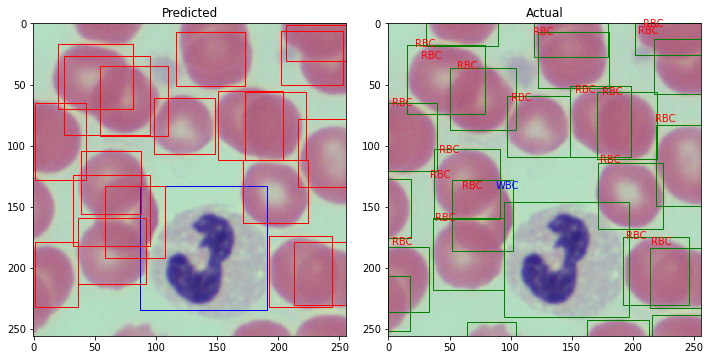



[[  1.           0.99999917 124.44986     19.650932   181.12239
   79.30729   ]
 [  1.           0.99999785 187.18906     11.405092   258.13632
   73.87505   ]
 [  1.           0.99999607  55.92174     69.13635    130.41324
  129.23701   ]
 [  1.           0.9999951   -6.7720056   67.5201      60.437965
  129.9436    ]
 [  1.           0.99999475  62.858395    21.397177   129.39513
   65.40903   ]
 [  1.           0.9999771  214.78073    156.71655    283.91922
  213.7027    ]
 [  1.           0.99996793 224.41        51.415264   284.19547
  112.30831   ]
 [  1.           0.99996364 191.26492    246.36266    263.4149
  297.59488   ]
 [  1.           0.99989927 150.66013    229.40892    204.74902
  293.87643   ]
 [  1.           0.99981815   2.3283699  251.99286     60.521328
  301.8751    ]
 [  1.           0.99976903 192.0144     181.46553    258.68887
  237.24608   ]
 [  1.           0.9997309  193.36353     87.057465   252.02797
  162.44809   ]
 [  1.           0.99698454 129.58293

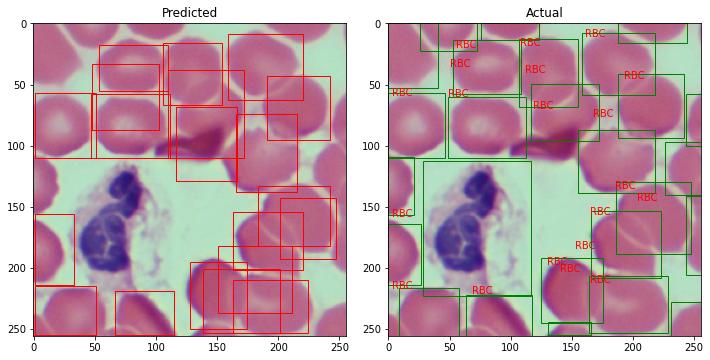



[[  1.           0.99999714   3.3434584   31.67185     81.77283
  108.71065   ]
 [  1.           0.9999896  243.31673    165.46017    302.36142
  223.84293   ]
 [  1.           0.9999821   35.4006      59.324608    98.63153
  121.60961   ]
 [  1.           0.9999809  118.3427       6.3076034  185.22998
   73.226006  ]
 [  1.           0.9999515  235.60971     13.968183   291.60834
   72.55095   ]
 [  2.           0.9999486   84.00586     82.600555   185.89555
  188.38254   ]
 [  1.           0.9999323   90.76812    251.55037    156.11218
  302.28012   ]
 [  1.           0.9999238  247.84926    225.24673    305.5711
  289.47418   ]
 [  1.           0.99990976  23.106718   138.07486     83.06255
  198.4488    ]
 [  1.           0.99989796  57.13744    250.95363    113.11279
  300.68335   ]
 [  1.           0.9997602   28.365807   225.23499     88.33724
  286.2601    ]
 [  1.           0.9997423  139.53714     16.71839    217.08502
   86.78724   ]
 [  1.           0.9996916  183.99245  

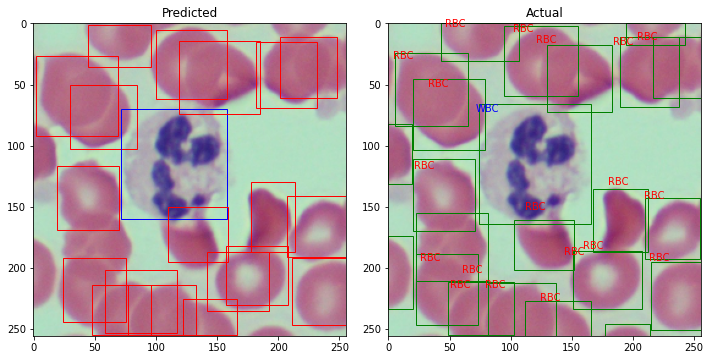



[[  1.           0.9999914    3.0409904  242.1104      65.54001
  299.59286   ]
 [  1.           0.99998164 191.57437    227.66942    262.85333
  300.34164   ]
 [  1.           0.9999713  241.97478      1.3678081  300.48254
   65.64876   ]
 [  1.           0.99996316 183.02486     38.520134   254.34015
  111.79225   ]
 [  1.           0.9999567   18.249453    86.629234    83.890915
  142.67943   ]
 [  1.           0.99994254 100.00619    240.60466    158.53139
  302.20517   ]
 [  1.           0.9998703   91.8083      -4.433779   169.30347
   50.432755  ]
 [  1.           0.9997876   41.397045   233.63083     93.681946
  294.0172    ]
 [  2.           0.99932635  97.89553    107.45737    168.6104
  188.7317    ]
 [  1.           0.9993261  176.9908       1.8157237  240.25906
   34.68685   ]
 [  1.           0.99905914 124.82947    190.73886    183.42319
  253.56999   ]
 [  1.           0.99905556  31.606749    99.14741    108.48992
  167.28543   ]
 [  1.           0.9988488  193.06052

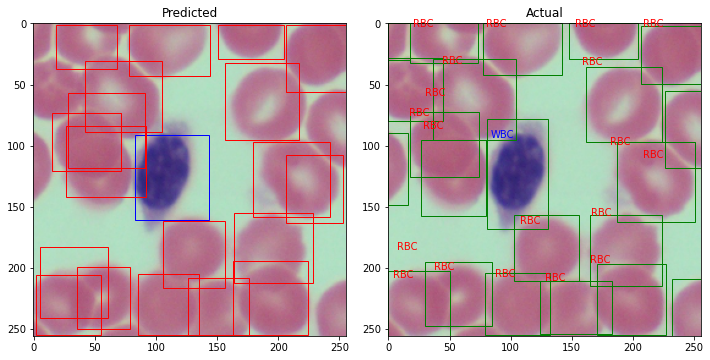



[[  1.           0.9999994  152.4111     244.4222     206.56978
  301.38245   ]
 [  2.           0.99999607 186.55327    163.3064     303.5859
  263.65112   ]
 [  1.           0.99998915 114.182785    69.17491    187.94232
  129.35023   ]
 [  1.           0.9999888   21.697853   250.80354     92.263115
  302.4685    ]
 [  1.           0.9999877   81.70503    245.03906    136.60997
  302.4442    ]
 [  1.           0.9999777   42.13138    186.53435     93.92083
  248.16884   ]
 [  1.           0.99997663  39.07609     -0.550387    95.72234
   57.25606   ]
 [  1.           0.9999759  219.0553      -3.1244137  279.79398
   47.43342   ]
 [  1.           0.99995756   7.8728175  176.70769     76.951904
  241.5744    ]
 [  1.           0.9999403   52.716423   133.1531     112.463165
  188.87404   ]
 [  1.           0.9998709  251.14517     47.067413   300.8968
   99.63171   ]
 [  1.           0.9998578  249.57674    106.64687    302.03082
  170.36516   ]
 [  1.           0.9998357  169.80255

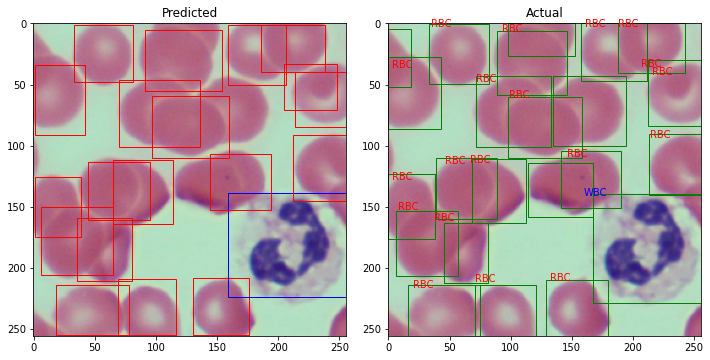



[[  1.           0.99997425 119.7717      36.789402   172.68095
   94.74983   ]
 [  1.           0.9999715  212.7508     130.52095    281.24783
  200.71658   ]
 [  1.           0.99995506  29.393843   228.47299     90.142136
  283.99582   ]
 [  1.           0.99994206   2.9441133  161.55347     44.670708
  224.95538   ]
 [  1.           0.99991715 176.19244     34.417088   251.84047
  104.78357   ]
 [  1.           0.9999145  202.80748    102.59262    265.54953
  157.19344   ]
 [  1.           0.99987197  58.88057      3.7205973  124.30083
   65.2894    ]
 [  1.           0.99970144  28.005001    59.91733     92.35383
  122.00786   ]
 [  1.           0.99964297 123.89484    219.55692    186.35963
  279.05093   ]
 [  1.           0.9995277   96.026596   184.42746    159.22987
  236.37859   ]
 [  1.           0.9991192   53.118046   138.3065     113.36253
  212.88371   ]
 [  1.           0.99890244 145.18127    212.8161     218.12108
  278.7137    ]
 [  1.           0.9986993   77.5097

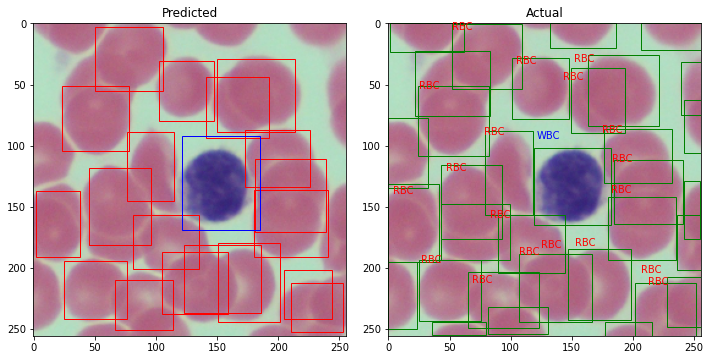



[[  2.           0.9999976   58.576862    47.349495   174.41515
  156.82713   ]
 [  1.           0.9999964  144.5868     224.48651    210.02805
  288.17215   ]
 [  1.           0.9999882   18.356207    29.802929    82.59082
   88.01385   ]
 [  1.           0.9999838   -1.6959183  166.57144     57.591846
  232.8088    ]
 [  1.           0.9999825   48.132732   189.50386    118.07396
  259.32938   ]
 [  1.           0.9999504  208.43694    198.01712    271.62192
  254.77141   ]
 [  1.           0.999944    82.08791    228.00085    133.91061
  283.2384    ]
 [  1.           0.99993694 111.994385   160.15456    184.83517
  229.74315   ]
 [  1.           0.9998902  197.12282     23.905975   254.50317
   91.81212   ]
 [  1.           0.99988663 152.86894      3.6620512  215.22122
   85.42893   ]
 [  1.           0.9998141   25.086279     5.942852    89.54186
   66.636536  ]
 [  1.           0.9998067   19.302792    98.142044    70.64941
  161.01933   ]
 [  1.           0.9997882  231.88037

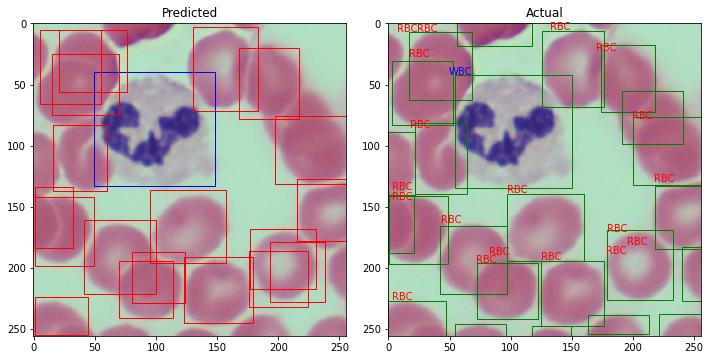



[[  1.           0.999972    27.676579    38.22567     91.99352
   98.494896  ]
 [  1.           0.9999684   32.431328   104.553345   101.50006
  159.82639   ]
 [  1.           0.9998921   19.19446    196.60046     96.117485
  259.24106   ]
 [  1.           0.99983585  65.08633    115.38715    133.13707
  181.82588   ]
 [  1.           0.9996716  211.93576      0.7255554  284.36765
   59.228943  ]
 [  1.           0.9996486   82.590965   253.59854    147.11314
  303.2744    ]
 [  1.           0.99962926 140.35172     -0.66865456 210.0329
   37.91391   ]
 [  2.           0.99958116 167.36974     93.541374   290.381
  239.08186   ]
 [  1.           0.99918777   5.851771   208.42369     72.37674
  270.38724   ]
 [  1.           0.99900144 127.296394   120.04171    176.28311
  171.8142    ]
 [  1.           0.9987734   -4.4134746   -0.64026785  47.588966
   69.41061   ]
 [  1.           0.9986248   80.92117     35.348385   152.2049
  105.51645   ]
 [  1.           0.99697447 192.22336   

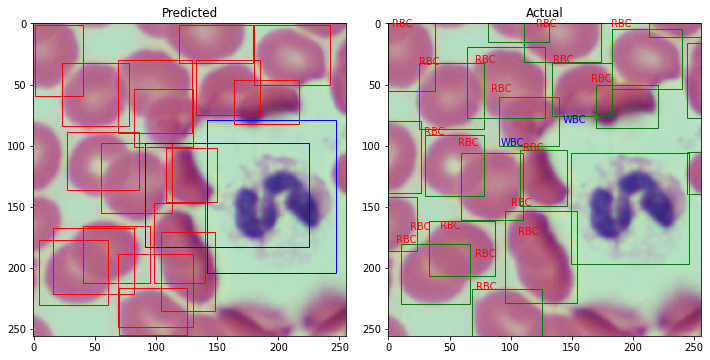



[[ 1.00000000e+00  9.99998808e-01  2.25663254e+02  7.62511292e+01
   2.73974060e+02  1.36038269e+02]
 [ 1.00000000e+00  9.99997139e-01 -1.16150826e-01  6.40730667e+01
   5.38627014e+01  1.23093681e+02]
 [ 1.00000000e+00  9.99997020e-01  2.82765675e+01  1.23851135e+02
   8.87293167e+01  1.85612030e+02]
 [ 1.00000000e+00  9.99996543e-01  1.21520485e+02  1.94650497e+02
   1.87694366e+02  2.56562744e+02]
 [ 1.00000000e+00  9.99996305e-01  1.98842621e+02  1.86765411e+02
   2.50676987e+02  2.32011627e+02]
 [ 1.00000000e+00  9.99984622e-01  1.49656000e+01  2.38026535e+02
   7.38179245e+01  2.91005463e+02]
 [ 1.00000000e+00  9.99983907e-01  2.29238785e+02  2.20894821e+02
   2.96238281e+02  2.78738037e+02]
 [ 1.00000000e+00  9.99980688e-01  6.43171082e+01  9.92976093e+00
   1.33451294e+02  7.24567642e+01]
 [ 1.00000000e+00  9.99962449e-01  4.52944679e+01  1.98851791e+02
   1.17005661e+02  2.49965714e+02]
 [ 2.00000000e+00  9.99961853e-01  1.05659775e+02  8.39319153e+01
   2.20804764e+02  1.83

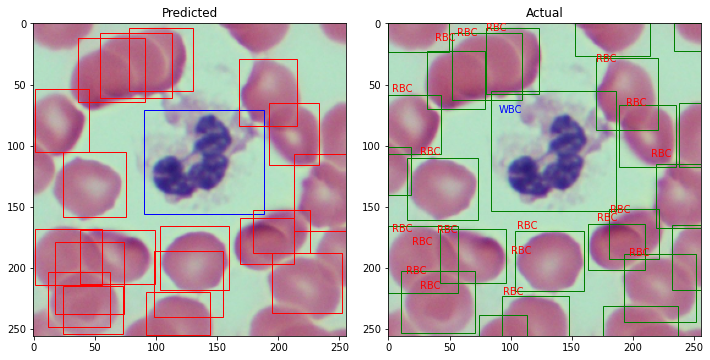



[[  1.           0.9999981  107.107666   111.24596    173.00352
  166.05072   ]
 [  1.           0.9999919   73.556114     7.832649   135.91855
   64.16899   ]
 [  1.           0.9999877  142.98961      9.615822   210.75748
   74.67904   ]
 [  1.           0.9999844   49.164078   257.40616    112.69847
  303.65747   ]
 [  1.           0.999951   195.11993     82.98577    257.24033
  145.21555   ]
 [  2.           0.9999393   96.06278    152.96631    207.5426
  272.1432    ]
 [  1.           0.9999205  213.33307    208.13754    285.31082
  275.00647   ]
 [  1.           0.99978095   4.587619   128.66132     65.377426
  194.1129    ]
 [  1.           0.9997291  158.94109     82.16441    215.2138
  143.02637   ]
 [  1.           0.99972874  19.45549    106.675385    89.66689
  192.19276   ]
 [  1.           0.99966073 175.9588      15.335098   248.90315
   83.33895   ]
 [  1.           0.99945086  -2.9972904   24.35989     47.00364
   81.31126   ]
 [  1.           0.9964976  171.87431  

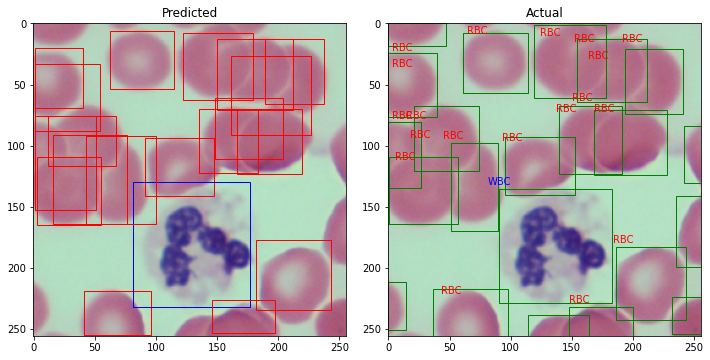



[[  1.           0.9999993    4.9161115   56.23439     64.64374
  126.51175   ]
 [  1.           0.9999865  228.81668    210.46254    294.66614
  273.17093   ]
 [  1.           0.9999845  135.61589    234.705      205.2158
  295.11075   ]
 [  1.           0.99997234  24.107471    25.9321      91.6572
   88.166214  ]
 [  1.           0.9999461   92.82775     16.657108   176.39021
   95.89792   ]
 [  1.           0.99993825 196.50552     75.749245   267.97357
  150.7391    ]
 [  1.           0.99991596 113.62869     45.3138     181.01733
  100.02142   ]
 [  1.           0.999866    41.409527   115.90035    105.88583
  177.7663    ]
 [  2.           0.9997843   99.95361    121.29431    225.41698
  240.98772   ]
 [  1.           0.9997528  229.24875    192.70299    293.55814
  244.27225   ]
 [  1.           0.99965215 246.27708    103.21907    302.6422
  172.51646   ]
 [  1.           0.9996426  189.4441       5.5456324  266.68237
   74.43606   ]
 [  1.           0.9992636   63.28513    

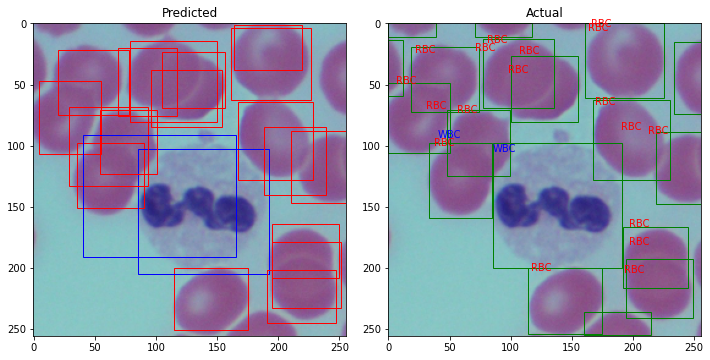



Mean IoU of test dataset 0.7276502043383435


In [160]:
averageiou=[]
predictedlabels=[]
actuallabels=[]
for idx, image_name in enumerate(images):
    #print(row)

    input_image = image_name
    image = cv2.imread(input_image)  # read image in bgr format
    im = Image.open(input_image)
    # image = cv2.resize(image, (0, 0), fx=0.3, fy=0.3)
    image = np.array(image, dtype=np.float)
    image = np.uint8(image)

    display_image = image.copy()
    image_height, image_width, _ = image.shape
    height_scale, width_scale = input_size/image_height, input_size/image_width

    image = cv2.resize(image, (input_size, input_size))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = process_input_fn(image)

    image = np.expand_dims(image, axis=0)
    y_pred = model.predict(image)
    print(y_pred[0])
    fig, ax = plt.subplots(1, 2, figsize=(10,7))
    fig.tight_layout()
    pyplot.subplot(121)
    plt.imshow(im)
    pyplot.title('Predicted')
    ax = plt.gca()
    pyplot.subplot(122, sharex=ax)
    plt.imshow(im)

    pyplot.title('Actual')
    ax1 = plt.gca()
    
    for i,row in testdf[testdf['image']==image_name].iterrows():
           #print(rows['xmin'])


    
           rect1 = Rectangle((row['xmin'],row['ymin']),row['xmax']-row['xmin'],row['ymax']-row['ymin'],linewidth=1,edgecolor='green',facecolor='none',label='Label')
         
           ax1.add_patch(rect1)
           

    for i, pred in enumerate(y_pred[0]):
        
        classname = label_maps[int(pred[0]) - 1].upper()
        confidence_score = pred[1]

        score = f"{'%.2f' % (confidence_score * 100)}%"
        print(f"-- {classname}: {score}")
        

        if confidence_score <= 1 and confidence_score > 0.5:
            xmin = max(int(pred[2] / width_scale), 1)
            ymin = max(int(pred[3] / height_scale), 1)
            xmax = min(int(pred[4] / width_scale), image_width-1)
            ymax = min(int(pred[5] / height_scale), image_height-1)
            maxiou=0
            label="" 
            for i,row in testdf[testdf['image']==image_name].iterrows():
           #print(rows['xmin'])

              iou = bb_intersection_over_union([xmin,ymin,xmax,ymax],[row['xmin'],row['ymin'],row['xmax'],row['ymax']])
              if(iou>maxiou):
                maxiou=iou
                label=row['label']
            actuallabels.append(label)
            predictedlabels.append(classname.lower())
              #rect1 = Rectangle((row['xmin'],row['ymin']),row['xmax']-row['xmin'],row['ymax']-row['ymin'],linewidth=1,edgecolor='green',facecolor='none',label='Label')
              #ax1.add_patch(rect1)

            if(classname=="WBC"):
                 
                rect = Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=1,edgecolor='b',facecolor='none',label='WBC')
                centerx , centery = xmin + 0.5, ymin+2 # obviously use a different formula for different shapes

                plt.text(centerx, centery,'WBC',color='blue')

            if(classname=="RBC"):
                rect = Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=1,edgecolor='r',facecolor='none',label="RBC")
                centerx, centery = xmin+2,ymin+2 # obviously use a different formula for different shapes

                plt.text(centerx, centery,'RBC',color='red')

            print(maxiou)
            averageiou.append(maxiou)
            

            ax.add_patch(rect)
    plt.show()





    print("\n")
print("Mean IoU of test dataset",sum(averageiou)/len(averageiou))


In [155]:
print(len(predictedlabels))
print(len(actuallabels))

220
220


In [156]:
predictedlabels

['rbc',
 'wbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'wbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'wbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'wbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'wbc',
 'rbc',
 'rbc',
 'wbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',


In [120]:

actuallabels

['rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'wbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'wbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'wbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'wbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'wbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',


In [157]:

from sklearn.metrics import accuracy_score
accuracy_score(predictedlabels,actuallabels)

1.0

In [ ]:

!python test.py val.txt ./ ./ configs/ssd300_vgg16_pascal-voc-2007.json model.h5 --label_maps label_map.txt --output_dir ./  --num_predictions 4

2021-12-13 23:29:29.799651: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
1/14
2021-12-13 23:29:35.355057: W tensorflow/core/common_runtime/bfc_allocator.cc:343] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.
2/14
3/14
4/14
5/14
6/14
7/14
8/14
9/14
10/14
11/14
12/14
13/14
14/14


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   377    0   377    0     0    228      0 --:--:--  0:00:01 --:--:--   227
100 91.2M  100 91.2M    0     0  39.4M      0  0:00:02  0:00:02 --:--:-- 39.4M


<module 'json' from '/usr/lib/python3.7/json/__init__.py'>
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.96%
-- RBC: 99.95%
-- RBC: 99.94%
-- RBC: 99.93%
-- RBC: 99.91%
-- RBC: 99.91%
-- RBC: 99.89%
-- WBC: 99.87%
-- RBC: 99.84%
-- RBC: 99.83%
-- RBC: 99.73%
-- RBC: 99.34%
-- RBC: 99.26%
-- RBC: 99.22%
-- RBC: 99.18%


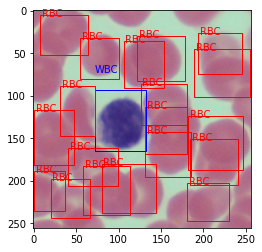



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- WBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.96%
-- RBC: 99.96%
-- RBC: 99.96%
-- RBC: 99.96%
-- RBC: 99.93%
-- RBC: 99.93%
-- RBC: 99.81%
-- RBC: 99.73%
-- RBC: 99.65%


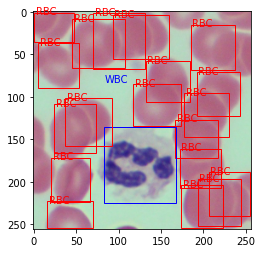



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- WBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.92%
-- RBC: 99.92%
-- RBC: 99.90%
-- RBC: 99.89%
-- RBC: 99.81%
-- RBC: 99.77%
-- RBC: 99.61%
-- RBC: 99.39%
-- RBC: 99.14%


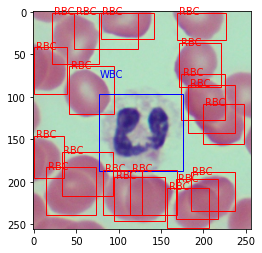



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.97%
-- WBC: 99.97%
-- RBC: 99.97%
-- RBC: 99.96%
-- RBC: 99.92%
-- RBC: 99.86%
-- RBC: 99.77%
-- RBC: 99.73%
-- RBC: 99.68%


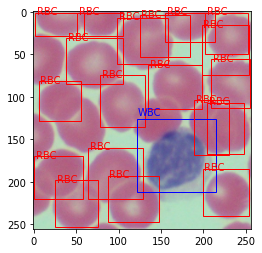



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.96%
-- RBC: 99.96%
-- RBC: 99.95%
-- RBC: 99.94%
-- RBC: 99.94%
-- WBC: 99.93%
-- RBC: 99.92%
-- RBC: 99.90%
-- RBC: 99.88%
-- RBC: 99.81%
-- RBC: 99.68%


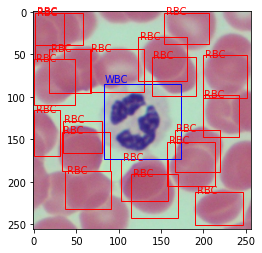



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.97%
-- RBC: 99.94%
-- RBC: 99.94%
-- RBC: 99.92%
-- RBC: 99.87%
-- RBC: 99.85%
-- RBC: 99.75%
-- WBC: 99.66%
-- RBC: 99.58%
-- RBC: 99.54%


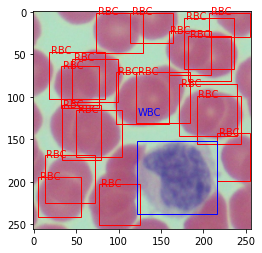



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- WBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.96%
-- RBC: 99.96%
-- RBC: 99.94%
-- RBC: 99.83%
-- RBC: 99.82%
-- RBC: 99.80%
-- RBC: 99.80%
-- RBC: 99.79%
-- RBC: 99.68%


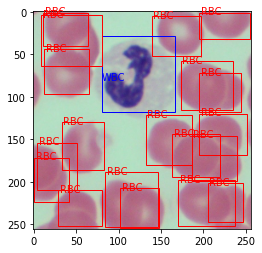



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.97%
-- RBC: 99.97%
-- RBC: 99.96%
-- WBC: 99.96%
-- RBC: 99.96%
-- RBC: 99.83%
-- RBC: 99.76%
-- RBC: 99.75%
-- RBC: 99.69%
-- RBC: 99.51%
-- RBC: 99.40%
-- RBC: 99.30%


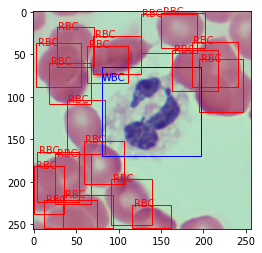



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.98%
-- WBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.96%
-- RBC: 99.96%
-- RBC: 99.92%
-- RBC: 99.87%
-- RBC: 99.69%
-- RBC: 99.68%


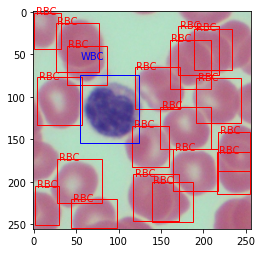



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.97%
-- WBC: 99.96%
-- RBC: 99.95%
-- RBC: 99.94%
-- RBC: 99.94%
-- RBC: 99.92%
-- RBC: 99.91%
-- RBC: 99.90%
-- RBC: 99.87%
-- RBC: 99.86%
-- RBC: 99.84%
-- RBC: 99.80%


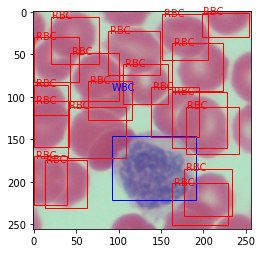



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.97%
-- RBC: 99.94%
-- RBC: 99.94%
-- RBC: 99.92%
-- WBC: 99.90%
-- RBC: 99.90%
-- RBC: 99.86%
-- RBC: 99.73%


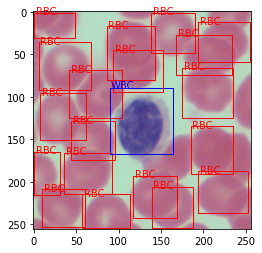



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- WBC: 99.97%
-- RBC: 99.97%
-- RBC: 99.95%
-- RBC: 99.95%
-- RBC: 99.86%
-- RBC: 99.82%
-- RBC: 99.69%
-- RBC: 99.61%
-- WBC: 99.59%
-- RBC: 99.59%
-- RBC: 99.47%
-- RBC: 99.13%
-- RBC: 98.91%


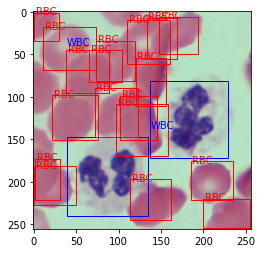



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.91%
-- RBC: 99.87%
-- RBC: 99.85%
-- RBC: 99.82%
-- RBC: 99.77%
-- RBC: 99.59%
-- RBC: 99.57%
-- RBC: 99.46%
-- RBC: 99.28%


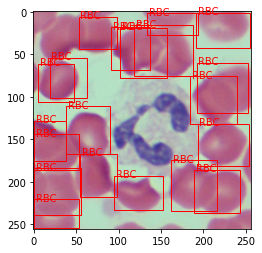



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.97%
-- RBC: 99.94%
-- RBC: 99.93%
-- RBC: 99.83%
-- RBC: 99.82%
-- RBC: 99.79%
-- RBC: 99.79%
-- RBC: 99.69%
-- RBC: 99.64%
-- RBC: 99.60%
-- WBC: 99.57%
-- RBC: 99.52%


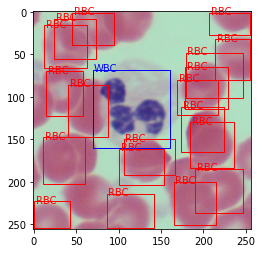



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.97%
-- RBC: 99.96%
-- RBC: 99.96%
-- RBC: 99.96%
-- RBC: 99.92%
-- RBC: 99.92%
-- WBC: 99.92%
-- RBC: 99.90%
-- RBC: 99.90%
-- RBC: 99.88%
-- RBC: 99.86%
-- RBC: 99.60%
-- RBC: 99.37%
-- RBC: 99.26%


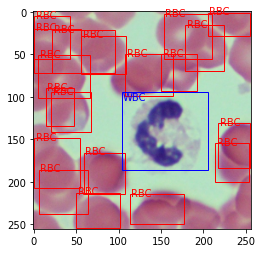



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.95%
-- RBC: 99.89%
-- RBC: 99.74%
-- WBC: 99.74%
-- RBC: 99.65%
-- RBC: 99.65%
-- RBC: 99.42%
-- RBC: 99.02%
-- RBC: 98.96%
-- RBC: 98.93%


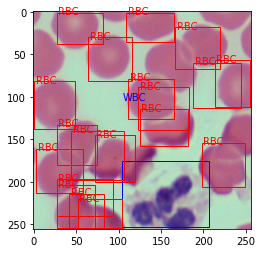



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.96%
-- RBC: 99.96%
-- WBC: 99.91%
-- RBC: 99.89%
-- RBC: 99.89%
-- RBC: 99.86%
-- RBC: 99.84%
-- RBC: 99.80%


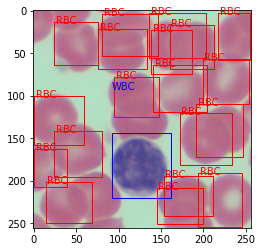



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.95%
-- RBC: 99.93%
-- RBC: 99.92%
-- RBC: 99.89%
-- RBC: 99.85%
-- RBC: 99.83%
-- RBC: 99.82%
-- RBC: 99.82%
-- RBC: 99.81%
-- RBC: 99.72%
-- RBC: 99.60%


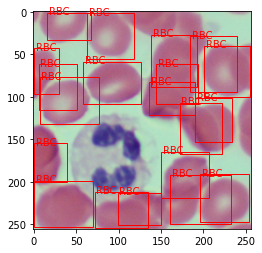



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.96%
-- RBC: 99.69%
-- RBC: 99.68%
-- RBC: 99.52%
-- RBC: 98.85%
-- RBC: 98.76%
-- RBC: 98.47%
-- RBC: 98.07%
-- RBC: 98.07%
-- RBC: 97.96%
-- RBC: 97.68%


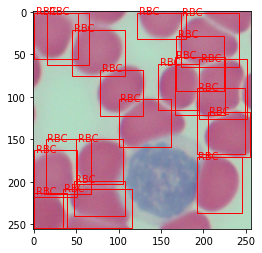



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.96%
-- RBC: 99.96%
-- WBC: 99.95%
-- RBC: 99.95%
-- RBC: 99.95%
-- RBC: 99.90%
-- RBC: 99.89%
-- RBC: 99.86%
-- RBC: 99.68%


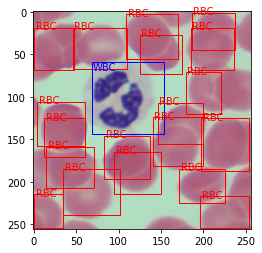



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.97%
-- RBC: 99.96%
-- RBC: 99.96%
-- RBC: 99.96%
-- RBC: 99.95%
-- RBC: 99.95%
-- RBC: 99.93%


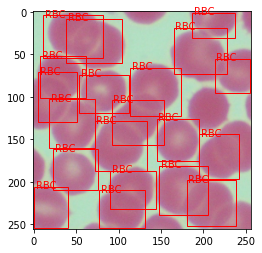



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.95%
-- WBC: 99.94%
-- RBC: 99.93%
-- RBC: 99.92%
-- RBC: 99.87%
-- RBC: 99.86%
-- RBC: 99.85%
-- RBC: 99.70%
-- RBC: 99.62%
-- RBC: 99.06%
-- RBC: 98.04%


KeyboardInterrupt: ignored

In [15]:
import cv2
import os
import json
import argparse
import numpy as np
from glob import glob
from utils import inference_utils
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
%matplotlib inline

#parser = argparse.ArgumentParser(
#    description='run inference on an input image.')
#parser.add_argument('images', type=str,
 #                   help='glob string for list of images.')
#parser.add_argument('config', type=str, help='path to config file.')
#parser.add_argument('weights', type=str, help='path to the weight file.')
###parser.add_argument('--label_maps', type=str, help='path to label maps file.')
#parser.add_argument('--confidence_threshold', type=float,
 #                   help='the confidence score a detection should match in order to be counted.', default=0.9)
#parser.add_argument('--num_predictions', type=int,
 #                   help='the number of detections to be output as final detections', default=10)
#args = parser.parse_args()

# assert os.path.exists(args.input_image), "config file does not exist"
#assert os.path.exists(args.config), "config file does not exist"
#assert args.num_predictions > 0, "num_predictions must be larger than zero"
##assert args.confidence_threshold > 0, "confidence_threshold must be larger than zero."
#assert args.confidence_threshold <= 1, "confidence_threshold must be smaller than or equal to 1."
print(json)
with open(r'configs/ssd300_vgg16_pascal-voc-2007.json', "r") as config_file:
  config = json.load(config_file)

input_size = config["model"]["input_size"]
model_config = config["model"]
label_maps="label_maps.txt"
if model_config["name"] == "ssd_vgg16":
    model, process_input_fn, label_maps = ssd_vgg16(config, "label_map.txt")
elif model_config["name"] == "ssd_mobilenetv1":
    model, process_input_fn, label_maps = inference_utils.ssd_mobilenetv1(config, args)
elif model_config["name"] == "ssd_mobilenetv2":
    model, process_input_fn, label_maps = inference_utils.ssd_mobilenetv2(config, args)
elif model_config["name"] == "tbpp_vgg16":
    model, process_input_fn, label_maps = inference_utils.tbpp_vgg16(config, args)
else:
    print(
        f"model with name ${model_config['name']} has not been implemented yet")
    exit()

model.load_weights("model.h5")


for idx, input_image in enumerate(list(glob('images/*'))):
    image = cv2.imread(input_image)  # read image in bgr format
    im = Image.open(input_image)
    # image = cv2.resize(image, (0, 0), fx=0.3, fy=0.3)
    image = np.array(image, dtype=np.float)
    image = np.uint8(image)

    display_image = image.copy()
    image_height, image_width, _ = image.shape
    height_scale, width_scale = input_size/image_height, input_size/image_width

    image = cv2.resize(image, (input_size, input_size))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = process_input_fn(image)

    image = np.expand_dims(image, axis=0)
    y_pred = model.predict(image)
    plt.imshow(im)
    ax = plt.gca()

    for i, pred in enumerate(y_pred[0]):
        classname = label_maps[int(pred[0]) - 1].upper()
        confidence_score = pred[1]

        score = f"{'%.2f' % (confidence_score * 100)}%"
        print(f"-- {classname}: {score}")
        

        if confidence_score <= 1 and confidence_score > 0.7:
            xmin = max(int(pred[2] / width_scale), 1)
            ymin = max(int(pred[3] / height_scale), 1)
            xmax = min(int(pred[4] / width_scale), image_width-1)
            ymax = min(int(pred[5] / height_scale), image_height-1)


            if(classname=="WBC"):
                rect = Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=1,edgecolor='b',facecolor='none',label='WBC')
                centerx = centery = xmin + 0.5/2 # obviously use a different formula for different shapes

                plt.text(centerx, centery,'WBC',color='blue')

            if(classname=="RBC"):
                rect = Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=1,edgecolor='r',facecolor='none',label="RBC")
                centerx, centery = xmin+2,ymin+2 # obviously use a different formula for different shapes

                plt.text(centerx, centery,'RBC',color='red')


            

            ax.add_patch(rect)
    plt.show()





    print("\n")

